<a href="https://colab.research.google.com/github/BenUCL/Reef-acoustics-and-AI/blob/main/Tutorial/1.Colab_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Viewing this on Github? Click 'Open in Colab' to start!

# **Colab notebook**

This notebook is a supporting tutorial for the study **Unlocking the soundscape of coral reefs with artificial intelligence: pretrained networks and unsupervised learning win out** by [Williams et al (2024)](https://www.biorxiv.org/content/10.1101/2024.02.02.578582v1).

All the tutorial scripts will be run with Google Colab. This first notebook is designed to introduce those unfamiliar with Google Colab to using this tool. It allows running of python code entirely from a web browser and is a nice entry point for beginners and advanced users alike.

# **Part 1: Introduction to Colab**

Learn the basics of Google Colaboratory, including:


1. How to create and save your own notebooks
2. How to run some simple code
3. How to install and import packages
4. How to upload your own data
5. How to connect and access data in your Google Drive account
6. How to access Colabs free GPU feature
7. Saving outputs




# 1. How to create and save your own notebooks

This notebook shared with  has is a frozen copy which will not be saved once you exit.

Its best to create your own copy. To do this, go to 'File' -> 'Save a copy in Drive'.

This will open a new notebook called 'Copy of colab_intro.ipynb' which has automatically been saved to your Google Drive. This should be the version you edit from here on. You can go to your Google Drive and move this to an appropriate folder if you wish.

You can also click on the name and remove the 'Copy of' prefix.

# 2. How to run some simple code

Click on this cell then hit the '+ Code' button to add a new code cell below.

Copy in: 'print("I am coding in Colab")' and hit the run button. The output will appear below.

In [ ]:
print("I am coding in Colab")

You can also use the shift + enter shortcut to run code cells.

Now we'll run some other simple code examples. Some cells will print an output below your cell, others won't, can you see why this is?

In [ ]:
a = 10
a

In [ ]:
b = 5

In [ ]:
b

In [ ]:
c = b*a

In [ ]:
print(c)

# 3. How to install and import packages

You will almost always need to work with packages. Colab comes with many of the most common packages preinstalled which saves you the time needed to install these.

To import a package which has been installed you simply need to run a code cell with 'import yourpackage', often with an abbreviated name using 'as', for example:

In [4]:
# scikit-learn a.k.a 'sklearn' is arguably the best machine learning package you can use to get started
import sklearn

# Other packages you will almost always want:
import numpy as np # for doing maths faster
import pandas as pd # for working with data frames/data tables

## 4. How to upload data

To begin working with your own data one option is to upload it to colab.

Download the example_coral_reef_data.csv from the Google Drive folder. Use the file option on the left sidebar and see if you can upload the csv here.

Once this has been added, hover over it and select the three dots. Copy the filepath and add that between the quotes '' below:


In [ ]:
# Load the csv into a pandas dataframe
df = pd.read_csv('')

# View the first 5 rows:
df.head()

## 5. How to connect and access data in your Google Drive account

Downloading datasets and packages to a Colab instance can be useful for small files as its quick and easy. However, your Colab instance will be lost after a period of inactivity (approx. 90min). As long as you hit save, your code and its ouputs will be viewable in the notebook. However, all variables, packages and data stored in memory will be lost - you'll have to upload and run all this again from the start when reconnecting.

Uploading larger datasets is often the most time consuming process when reconnecting. A better option for getting started is to access data stored on your GDrive account. This removes the need to upload new data.

To do this, we first need to connect your GDrive account to this Colab instance. You can use the following code, or the 'Mount Drive' option inside the 'Files' tab.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


You should now see the 'drive' folder added in your 'Files' tab.

## Accessing data

Next up, we need to place some data in your GDrive. This can be done by uploading it yourself. You can then access the file path and use this as we did above.

For the tutorial we won't use any of the full datasets from [Williams et al (2024)](https://www.biorxiv.org/content/10.1101/2024.02.02.578582v1) as these take up many gigabytes of space. Instead we'll be using a dataset of 262 one-minute soundscape recordings from coral reefs used in the publication. [Williams et al (2022)](https://doi.org/10.1016/j.ecolind.2022.108986).

This sample dataset is held within the `audio_dir` folder within the `Reef-acoustics-and-AI` zip file on the [Zenodo repository](https://doi.org/10.5281/zenodo.11106482) for the this study (make sure you have accessed the most up to date version of this repo from the tab on the right):
1. Download the tutorial file.
2. Unzip the file.
3. Upload the sample data folder into a folder called 'audio_dir' on your GDrive.

 This new 'audio_dir' folder should now be available in your GDrive where ever you saved it. Explore the files tab on the left to find this.

 We can listen to these files in Colab. Copy the path of one of these files (using the 3 dots again) below and have a listen. Note these particular recordings are quiet, headphones are normally needed.



In [2]:
from IPython.display import Audio
# Path to your audio file
audio_file = 'COPY PATH HERE'

wn = Audio(audio_file, autoplay=True)
display(wn)

We can also make plots in Colab. Lets look at a spectrogram of this audio file.

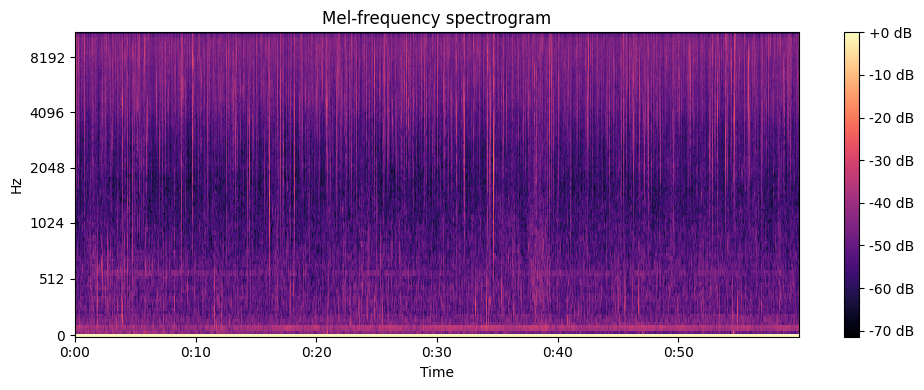

In [5]:
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Load the audio file
y, sr = librosa.load(audio_file)

# Generate the Mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr)

# Convert to log scale (dB)
S_dB = librosa.power_to_db(S, ref=np.max)

# Plotting
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

Any kind of plot you would expect to be able to create in a normal Python or R environment can be produced in Colab notebooks.

## 6. How to access Colabs free GPU feature

An added bonus of using Google Colab is that you can get free access (with limits) to a 'graphical processing unit' (GPU) for accelerated processing - pretty much essential for deep learning.

We will make use of this feature in the next tutorial to extract features with a pretrained neural netowkr.


Being free, access is nto always guaranteed. You can read more about the limits under the 'Resource Limits' heading here: https://research.google.com/colaboratory/faq.html

First lets see if you have a GPU enabled, this should currently be false:

In [ ]:
import torch

torch.cuda.is_available()

To access a GPU you must change your runtime type. This can be done by selecting 'Runtime' -> 'Change runtime type' -> 'Hardware accelerator' -> 'GPU'.

This will delete your current instance and restart a new one on a GPU so be sure to do this before you install any packages and download data (you will see that your GDrive and data folders we added are now gone).

Now, you've changed runtime type to a GPU rerun the above code cell to see if it now returns True. Occasionally you may not be allocated a GPU, especially if you have made heavy use of this feature recently.

We can mock up a quick matrix multiplication task to compare the execution speed of a GPU compared to CPU:

In [ ]:
import time
import torch

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Set dummy input data
input_data = torch.randn(10000, 10000).to(device)

# Time matrix multiplication
start_time = time.time()
output = input_data.matmul(input_data)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")


Elapsed time: 33.61 seconds


Make a note of the elapsed time. Now change your runtime back to a CPU by selecting 'None' and rerun the above code cell to see how long a CPU takes.

You will likely get different execution speeds to some peers when using a GPU, can you find out why online?

Top tip - the GPU only accelerates cells where we are either directly training or running inference using a neural network. All other cells only require a CPU. Its best to develop as much code as possible on your CPU before running on the GPU, so as to avoid hitting GPU useage caps imposed in Colab.

## 7. Saving your outputs

Saving your work is easy. You can save a copy of this notebook in your GDrive using 'File' -> 'Save a copy in Drive', or, if you use GitHub you can use 'File' -> 'Save a copy in Github' - be sure to create an appropriate repository on your GitHub account where this can be saved.

If you wrote any outputs to a file these will be saved in the 'Files' tab and can be downloaded from here - be sure to do this if you are quitting a session or taking an extended break as any files will be deleted when your runtime disconnects. If you saved these to a folder in your GDrive they will automatically be saved there.

## A note on colab notebooks stability

Colab uses a predefined environment where many of the standard packages come preinstalled which is super handy. However, if using any libraries beyond the standard packages, which these tutorials do, issues can arise overtime due to incompatibilities as packages update. Put simply, a colab notebook that worked at one point in time might not work in the future, it will require the user to update their code to work with newer versions of packages they are using or set the compatible versions of external packages to install.

## Conclusion

This notebook has given you a quick crash course in using Colab. We recommend colab and Google Drive as an excellent tool for starting your own projects with python and machine learning.

If you have some extra time, have a search online and see if you can find out more about when you may want to use Google Colab and when you may have to use other programming environments.

